In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# link to the dataset https://www.kaggle.com/datasets/willianleite/boston-housing-dataset
df = pd.read_csv('Boston.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
## Missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Attribute info:
CRIM: per capita crime rate by town \
ZN: proportion of residential land zoned for lots over 25,000 sq.ft. \
INDUS: proportion of non-retail business acres per town \
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) \
NOX: nitric oxides concentration (parts per 10 million) \
RM: average number of rooms per dwelling  \
AGE: proportion of owner-occupied units built prior to 1940 \
DIS: weighted distances to five Boston employment centres \
RAD: index of accessibility to radial highways \
TAX: full-value property-tax rate per $10,000 \
PTRATIO: pupil-teacher ratio by town \
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town \
LSTAT: % lower status of the population \
MEDV: Median value of owner-occupied homes in $1000's \

In [6]:
### Correlation

df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

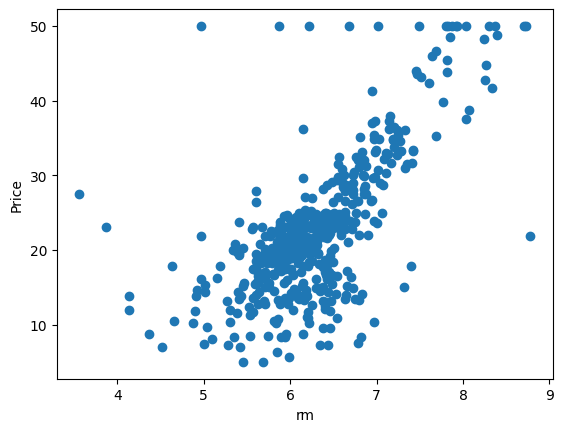

In [7]:
plt.scatter(df['rm'],df['medv'])
plt.xlabel('rm')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

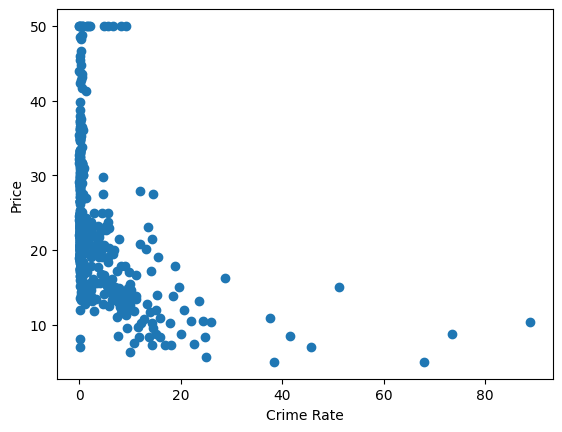

In [8]:
plt.scatter(df['crim'],df['medv'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

<Axes: xlabel='medv', ylabel='rm'>

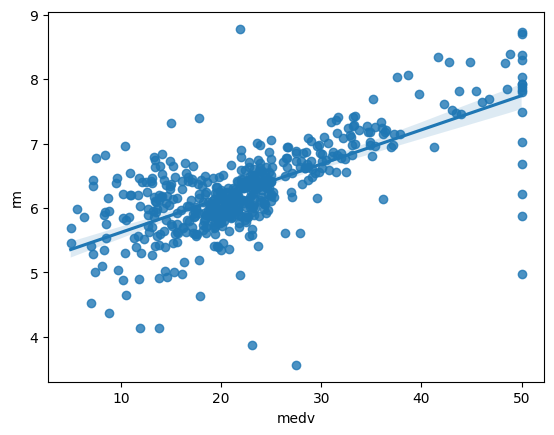

In [11]:
sns.regplot(data = df, x='medv', y = 'rm')

<Axes: xlabel='lstat', ylabel='medv'>

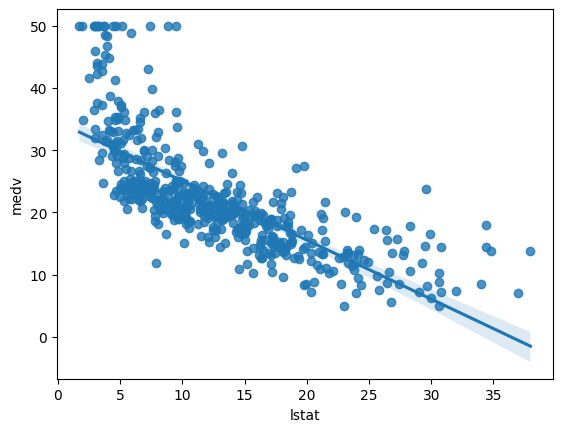

In [13]:
sns.regplot(data = df, x='lstat', y = 'medv')

<Axes: xlabel='chas', ylabel='medv'>

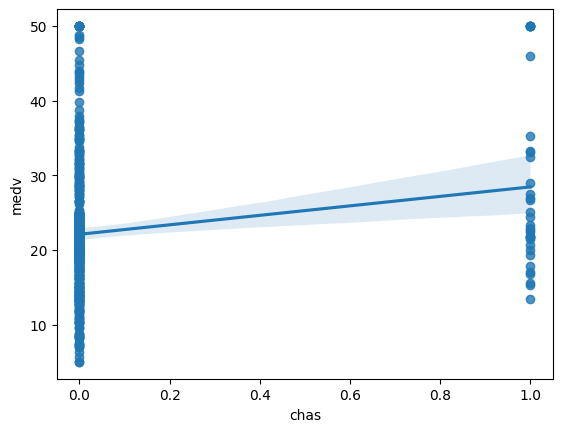

In [14]:
sns.regplot(data = df, x='chas', y = 'medv')

In [19]:
# Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
## train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [27]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
## print the coefficents and the intercept

print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [32]:
print(regression.intercept_)

23.01581920903955


In [34]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
### Prediction with the test data
reg_pred =regression.predict(X_test)

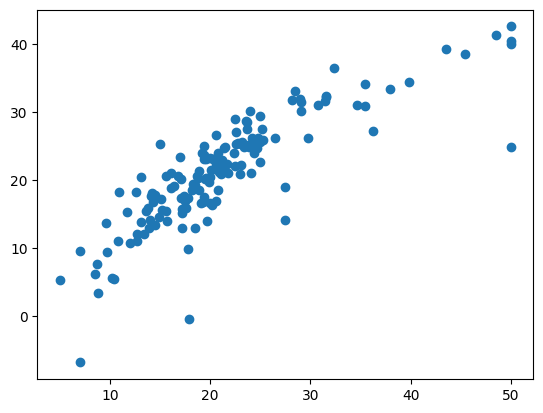

In [38]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [39]:
#errors
residuals = y_test-reg_pred

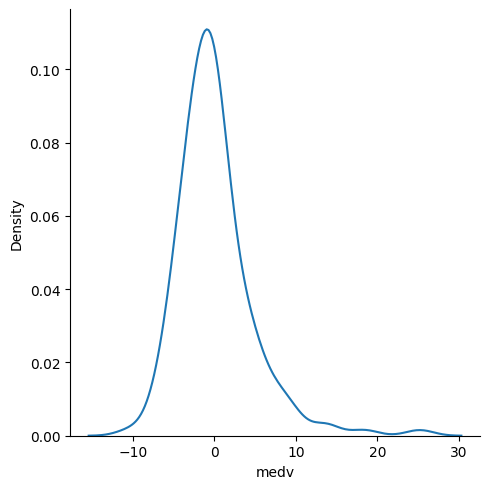

In [44]:
sns.displot(residuals,kind ="kde")

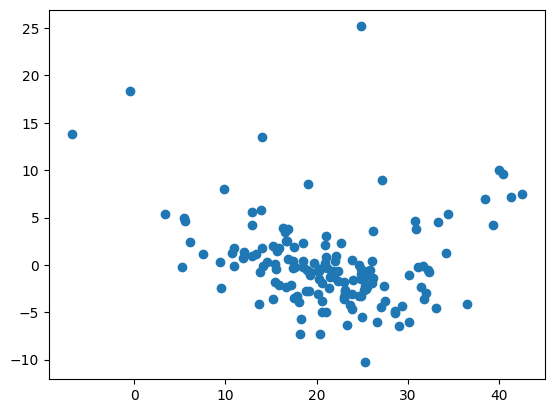

In [45]:
plt.scatter(reg_pred,residuals)

## Performance Checking


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574062
21.517444231177212
4.638689926172821


# R square and adjusted R square

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


In [49]:
# adjusted r square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

# Pickling the model file for deployment

In [83]:
import pickle

In [85]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [87]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [109]:
## Creating random data for making prediction 
import numpy as np

new_dummy = np.random.randn(1,13)

In [107]:
pickle_model.predict(scaler.transform(new_dummy))

array([32.4333666])